In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-dataset/heart_attack_dataset.csv


In [2]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
# Importing the Dataset
data = pd.read_csv("/kaggle/input/heart-attack-dataset/heart_attack_dataset.csv",encoding = 'unicode_escape')

In [4]:
# Shape of the dataset
data.shape

(1000, 8)

In [5]:
# To get the first 3 rows of the data
data.head(3)

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty


In [6]:
# To get the info. about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Cheking for duplicates
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Gender                   0
Age                      0
Blood Pressure (mmHg)    0
Cholesterol (mg/dL)      0
Has Diabetes             0
Smoking Status           0
Chest Pain Type          0
Treatment                0
dtype: int64

In [9]:
# Descriptive Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,60.338,17.317496,30.0,45.0,60.5,76.0,89.0
Blood Pressure (mmHg),1000.0,145.440,31.756525,90.0,118.0,146.0,173.0,199.0
Cholesterol (mg/dL),1000.0,223.789,42.787817,150.0,185.0,225.5,259.0,299.0


# EDA

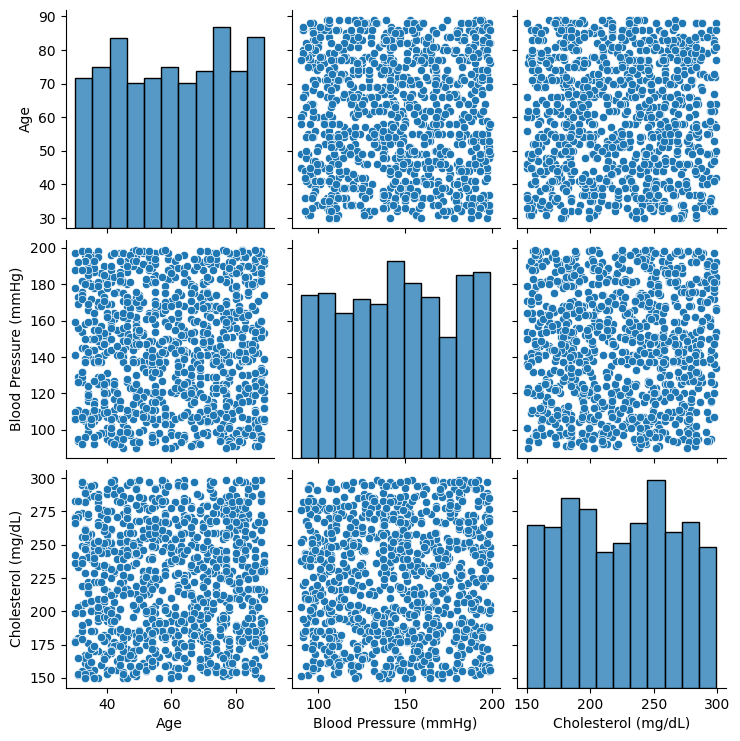

In [10]:
# To visualize the pairplot of data
sns.pairplot(data)

In [11]:
# no columns
data.describe(include = 'object')

,Gender,Has Diabetes,Smoking Status,Chest Pain Type,Treatment
count,1000,1000,1000,1000,1000
unique,2,2,3,4,4
top,Female,Yes,Never,Non-anginal Pain,Lifestyle Changes
freq,510,517,352,261,269


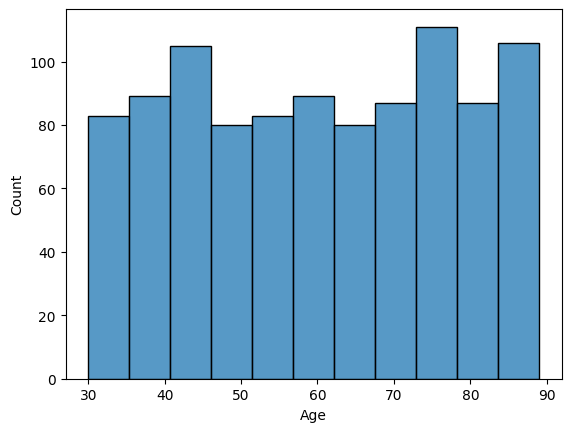

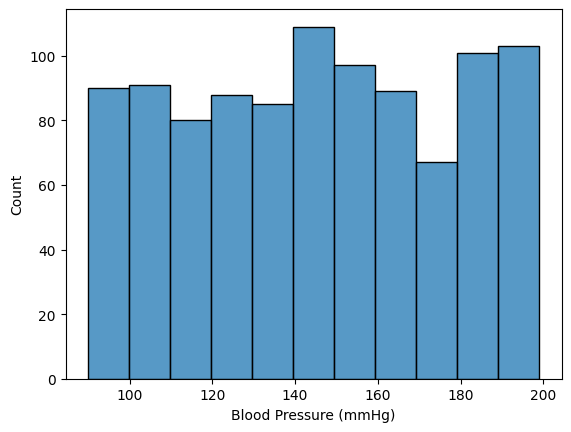

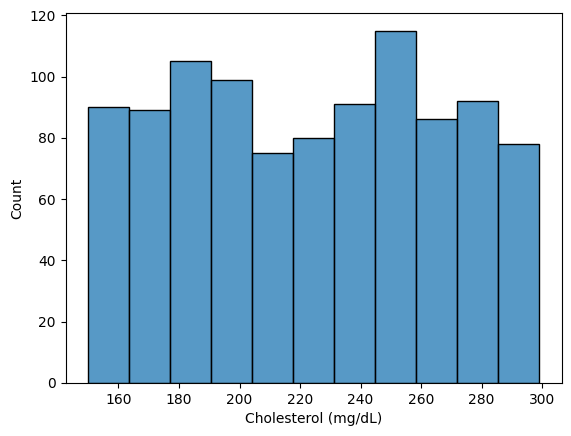

In [12]:
# Histogram to see  the distribution
for i in data.select_dtypes(include = "number").columns:
    sns.histplot(data = data, x = i)
    plt.show()

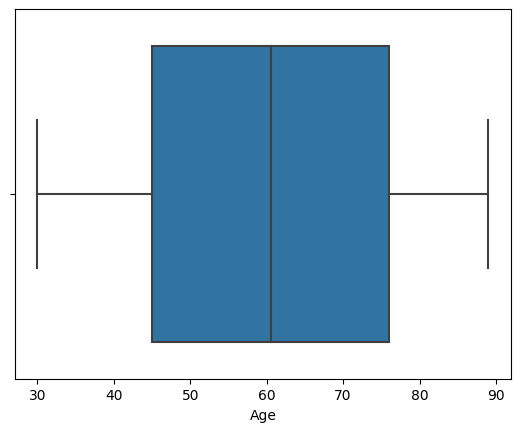

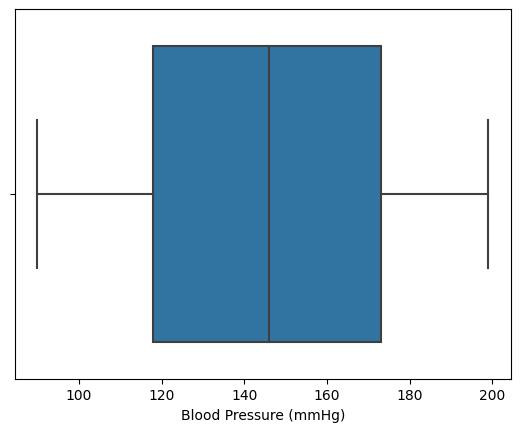

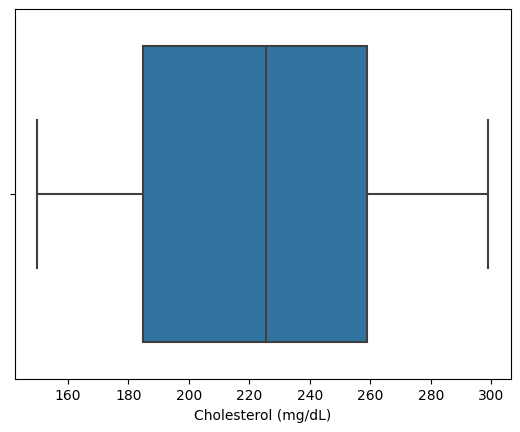

In [13]:
# Boxplot to identify Outliers
for i in data.select_dtypes(include = "number").columns:
    sns.boxplot(data = data, x = i)
    plt.show()

<Axes: >

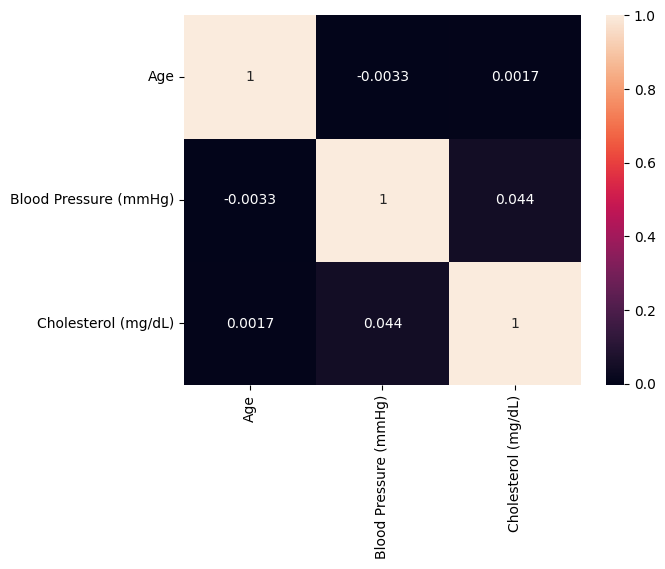

In [14]:
# Correlation with heatmap to interpret the relationa dn multicollinearity
s = data.select_dtypes(include = "number").corr()
sns.heatmap(s, annot = True)

In [15]:
data.columns

Index(['Gender', 'Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)',
       'Has Diabetes', 'Smoking Status', 'Chest Pain Type', 'Treatment'],
      dtype='object')

# Gender Distribution

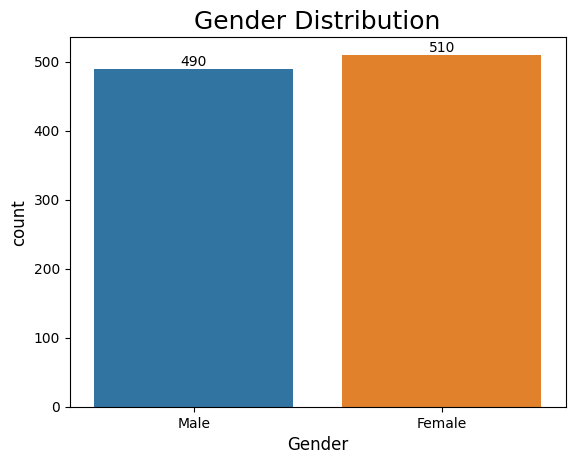

In [16]:
ax = sns.countplot(x = "Gender", data = data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Gender Distribution",fontsize = 18)
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("count", fontsize = 12)
plt.show()

In [17]:
# Define age bins and corresponding labels
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Create 'Age_Group' column
data['Age_Group'] = pd.cut(data['Age'], bins = age_bins, labels = age_labels, right = False)

print(data)

     Gender  Age  Blood Pressure (mmHg)  Cholesterol (mg/dL) Has Diabetes  \
0      Male   70                    181                  262           No   
1    Female   55                    103                  253          Yes   
2      Male   42                     95                  295          Yes   
3      Male   84                    106                  270           No   
4      Male   86                    187                  296          Yes   
..      ...  ...                    ...                  ...          ...   
995    Male   42                    125                  193          Yes   
996    Male   80                    186                  267          Yes   
997  Female   64                    108                  174          Yes   
998  Female   84                    123                  195           No   
999    Male   61                    155                  197           No   

    Smoking Status   Chest Pain Type                            Treatment  

# Age Distribution

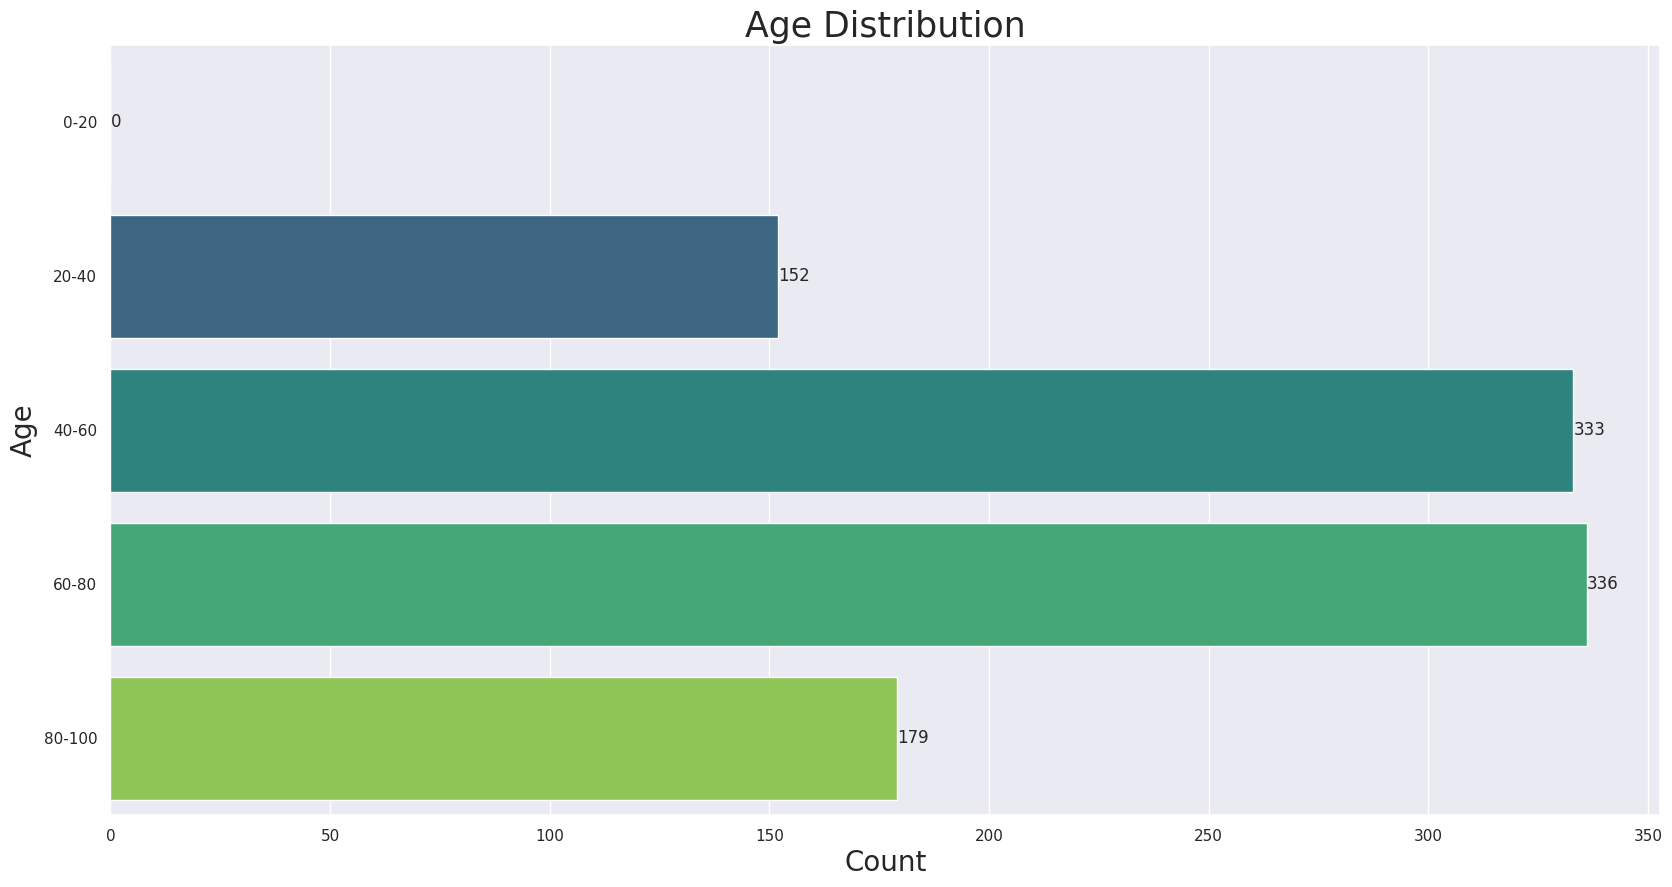

In [18]:
sns.set(rc = {'figure.figsize' : (20,10)})
ax = sns.countplot(y = "Age_Group", data = data, palette = 'viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Age Distribution", fontsize = 25)
plt.xlabel("Count", fontsize = 20)
plt.ylabel("Age", fontsize = 20)
plt.show()

# Blood Pressure

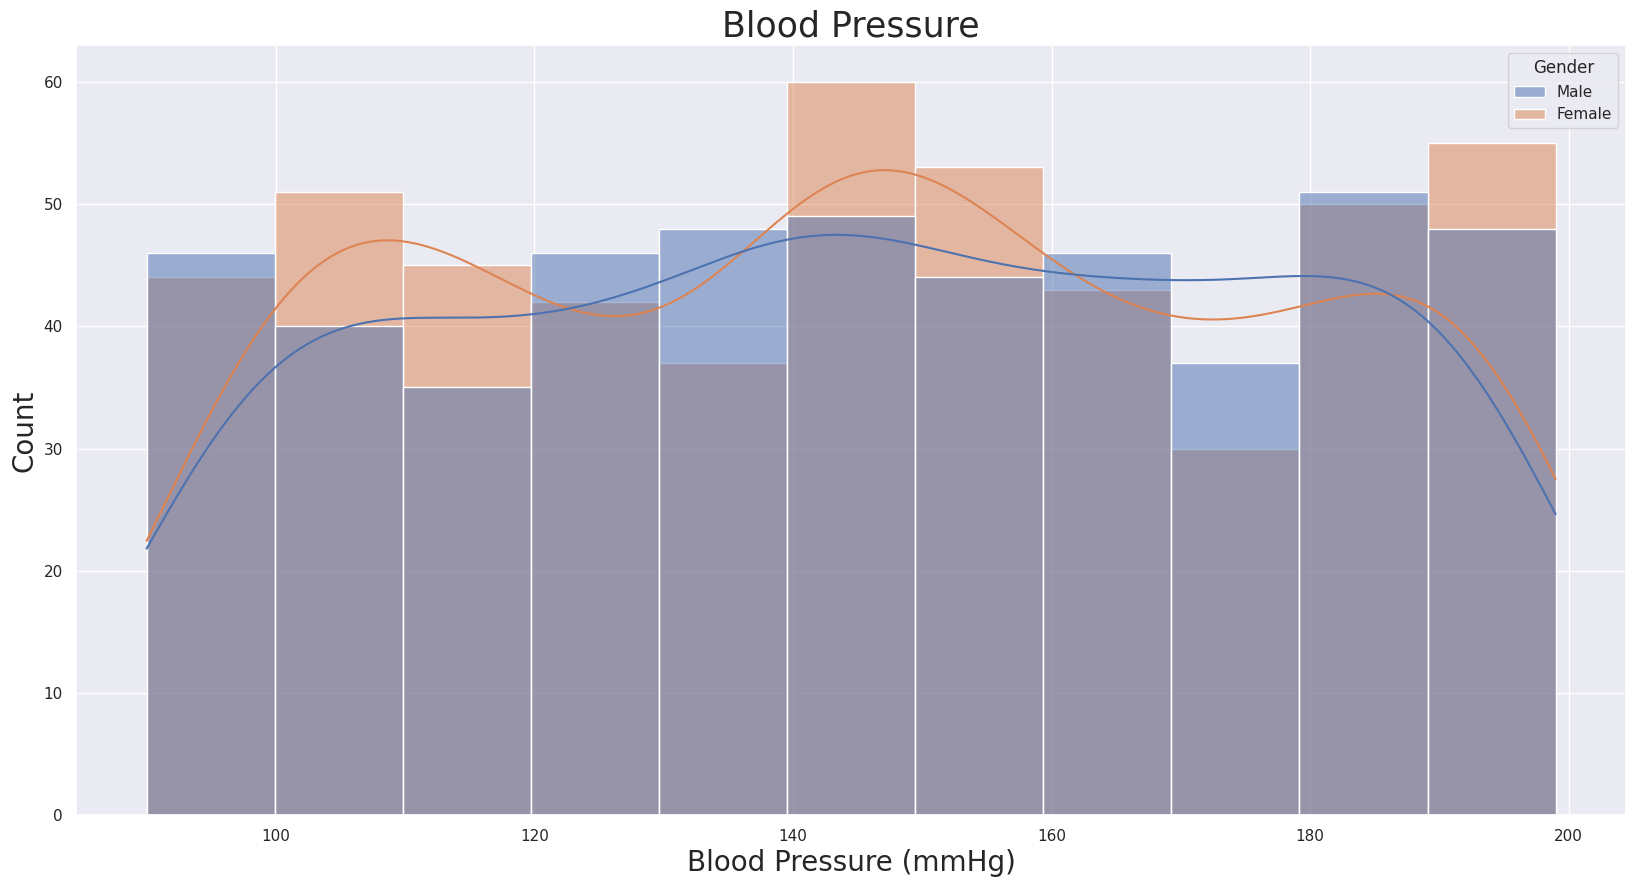

In [19]:
# Blood Pressure
sns.histplot(x = 'Blood Pressure (mmHg)',hue = 'Gender', data = data, kde = True)
# sns.histplot(data, kde=True)
plt.title("Blood Pressure", fontsize = 25)
plt.xlabel("Blood Pressure (mmHg)", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.show()

# Has Diabetes

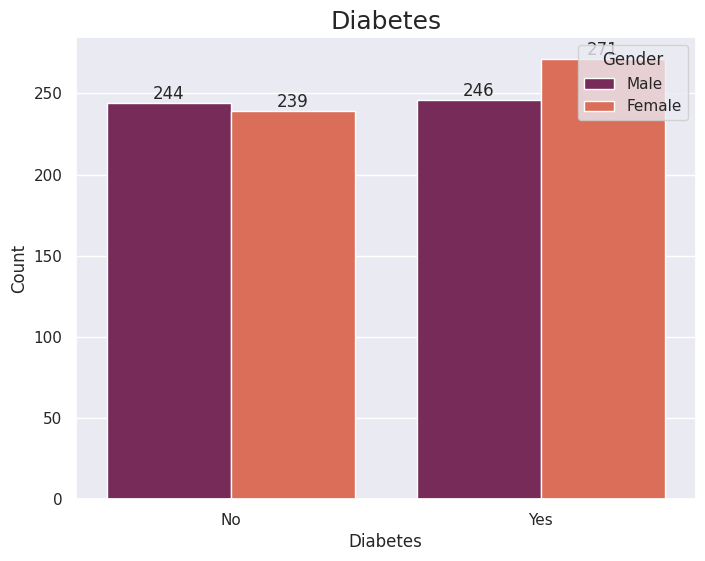

In [20]:
sns.set(rc = {'figure.figsize' : (8,6)})
ax = sns.countplot(x = "Has Diabetes", data = data,hue = 'Gender', palette = 'rocket')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Diabetes", fontsize = 18)
plt.xlabel("Diabetes", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

<!-- Diabetes Acoording to Age -->

# Diabetes acc to Age

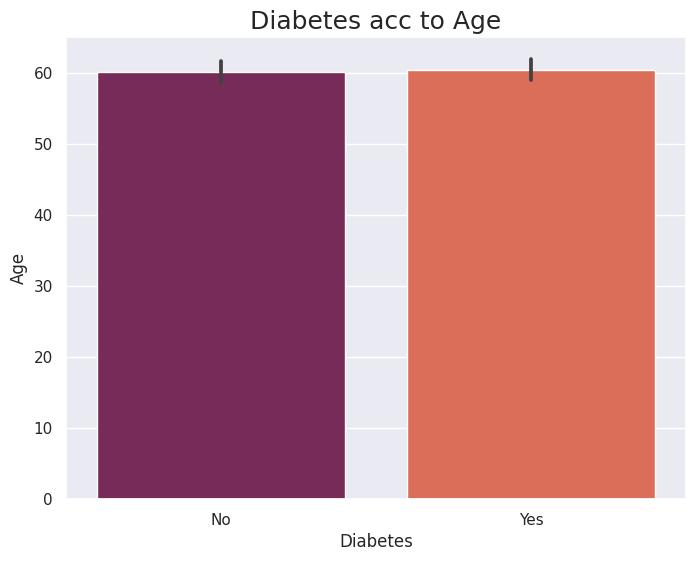

In [21]:
blood_age = data.groupby(['Has Diabetes'], as_index = False)['Age'].sum().sort_values(by = 'Age', ascending = False)
sns.barplot(x = 'Has Diabetes', y = 'Age', data = data, palette = 'rocket')
plt.title("Diabetes acc to Age", fontsize = 18)
plt.xlabel("Diabetes", fontsize = 12)
plt.ylabel("Age", fontsize = 12)
plt.show()

# Smoking Status

In [22]:
data['Smoking Status'].value_counts()

Smoking Status
Never      352
Current    325
Former     323
Name: count, dtype: int64

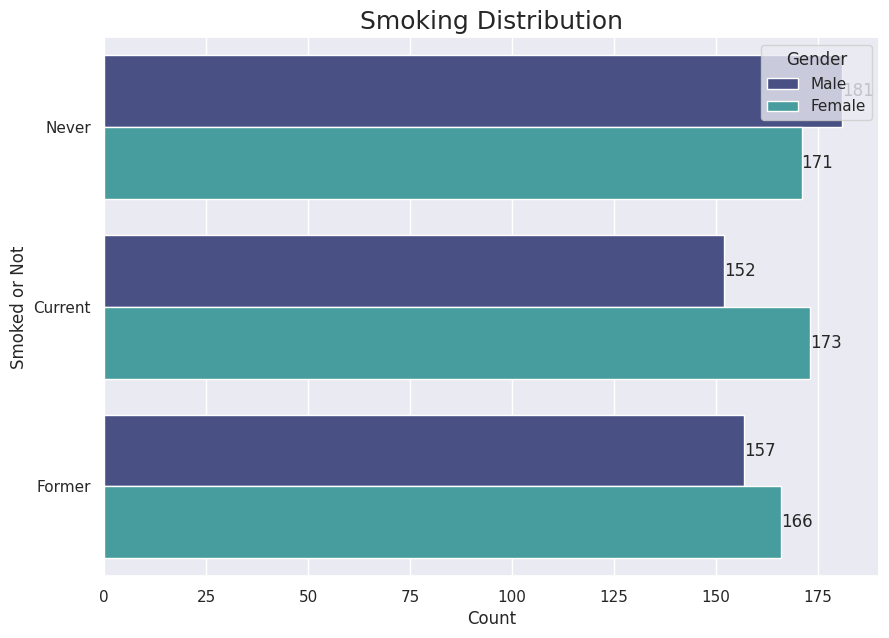

In [23]:
sns.set(rc = {'figure.figsize' : (10,7)})
ax = sns.countplot(y = "Smoking Status",hue = 'Gender', data = data, palette = 'mako')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Smoking Distribution", fontsize = 18)
plt.xlabel("Count", fontsize = 12)
plt.ylabel("Smoked or Not", fontsize = 12)
plt.show()

# Smoking acc to Age_Group and Gender

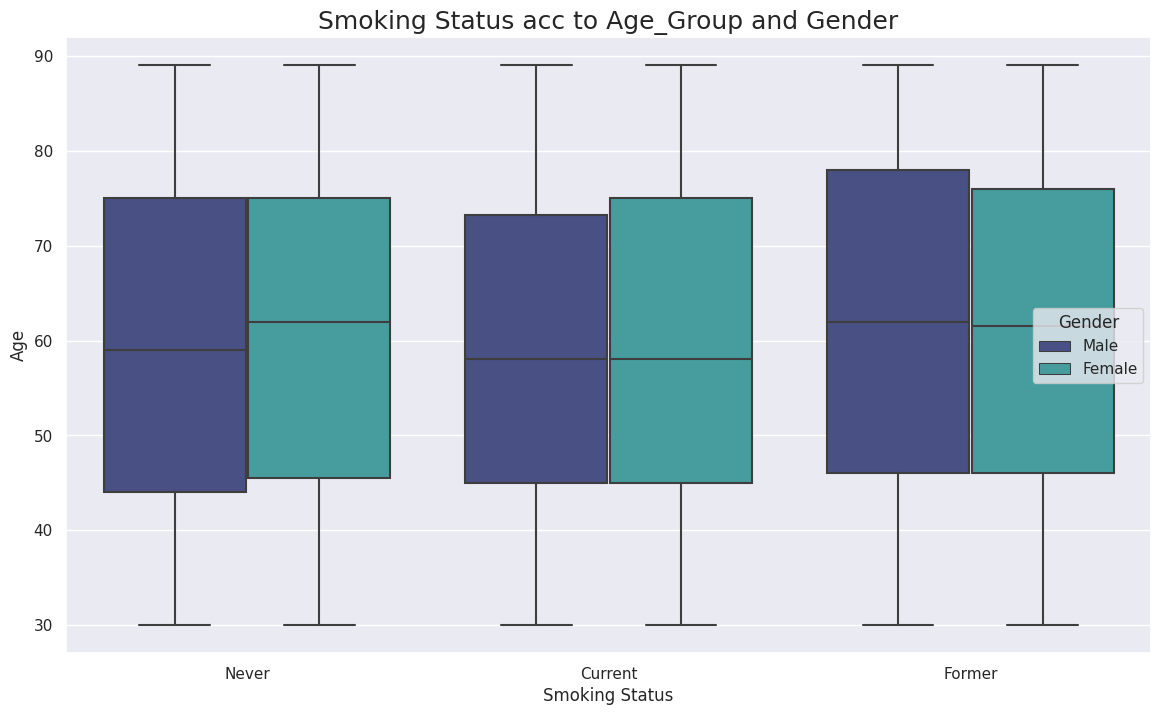

In [24]:
sns.set(rc = {'figure.figsize' : (14,8)})
smoking_age = data.groupby(['Smoking Status'], as_index = False)['Age'].sum().sort_values(by = 'Age', ascending = False)
sns.boxplot(x = 'Smoking Status', y = 'Age',hue = 'Gender', data = data, palette = 'mako')
plt.title("Smoking Status acc to Age_Group and Gender", fontsize = 18)
plt.xlabel("Smoking Status", fontsize = 12)
plt.ylabel("Age", fontsize = 12)
plt.show()

 # Chest Pain Distribution

In [25]:
data['Chest Pain Type'].value_counts()

Chest Pain Type
Non-anginal Pain    261
Asymptomatic        255
Typical Angina      243
Atypical Angina     241
Name: count, dtype: int64

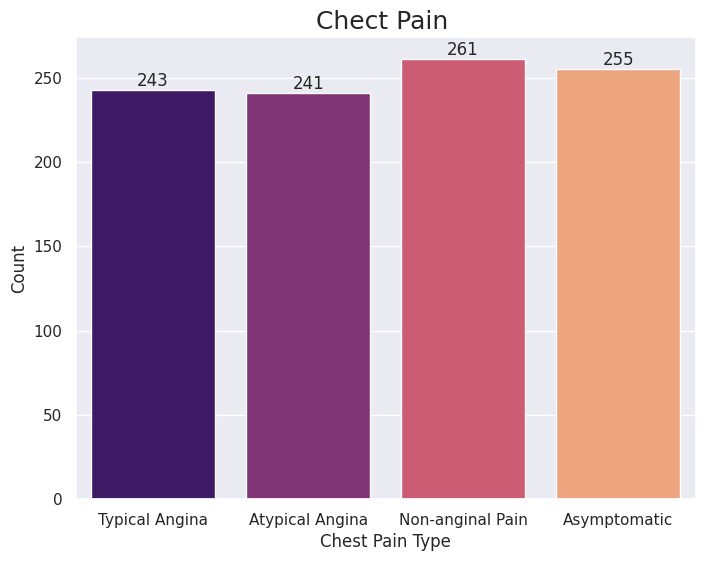

In [26]:
sns.set(rc = {'figure.figsize' : (8,6)})
ax = sns.countplot(x = "Chest Pain Type", data = data, palette = 'magma')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Chect Pain ", fontsize = 18)
plt.xlabel("Chest Pain Type", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

# Chect Pain acc to Age_Group and Cholesterol

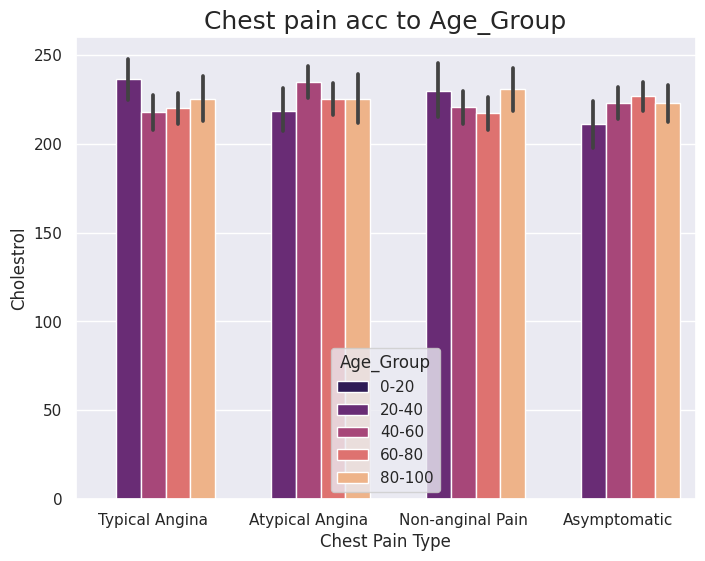

In [27]:
chest_choles = data.groupby(['Chest Pain Type'], as_index = False)['Cholesterol (mg/dL)'].sum().sort_values(by = 'Cholesterol (mg/dL)', ascending = False)
sns.barplot(x = 'Chest Pain Type', y = 'Cholesterol (mg/dL)',hue = 'Age_Group', data = data, palette = 'magma')
plt.title("Chest pain acc to Age_Group", fontsize = 18)
plt.xlabel("Chest Pain Type", fontsize = 12)
plt.ylabel("Cholestrol", fontsize = 12)
plt.show()

# Treatment acc to Age_Group and Cholestrol

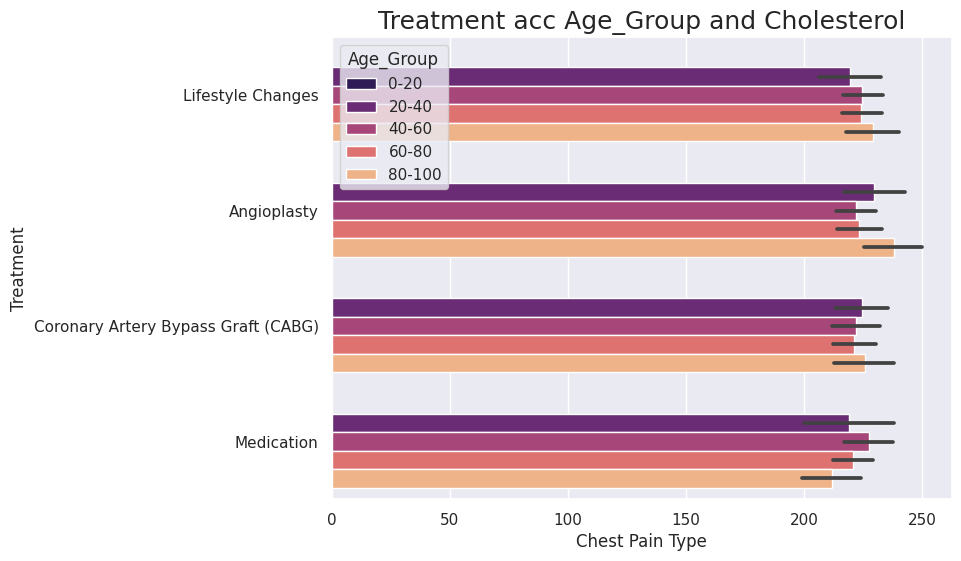

In [28]:
Treatment_pain = data.groupby(['Treatment'], as_index = False)['Cholesterol (mg/dL)'].sum().sort_values(by = 'Cholesterol (mg/dL)', ascending = False)
sns.barplot(y = 'Treatment', x = 'Cholesterol (mg/dL)',hue = 'Age_Group', data = data, palette = 'magma')
plt.title("Treatment acc Age_Group and Cholesterol", fontsize = 18)
plt.xlabel("Chest Pain Type", fontsize = 12)
plt.ylabel("Treatment", fontsize = 12)
plt.show()

# Treatment

In [29]:
data['Treatment'].value_counts()

Treatment
Lifestyle Changes                      269
Coronary Artery Bypass Graft (CABG)    252
Angioplasty                            247
Medication                             232
Name: count, dtype: int64

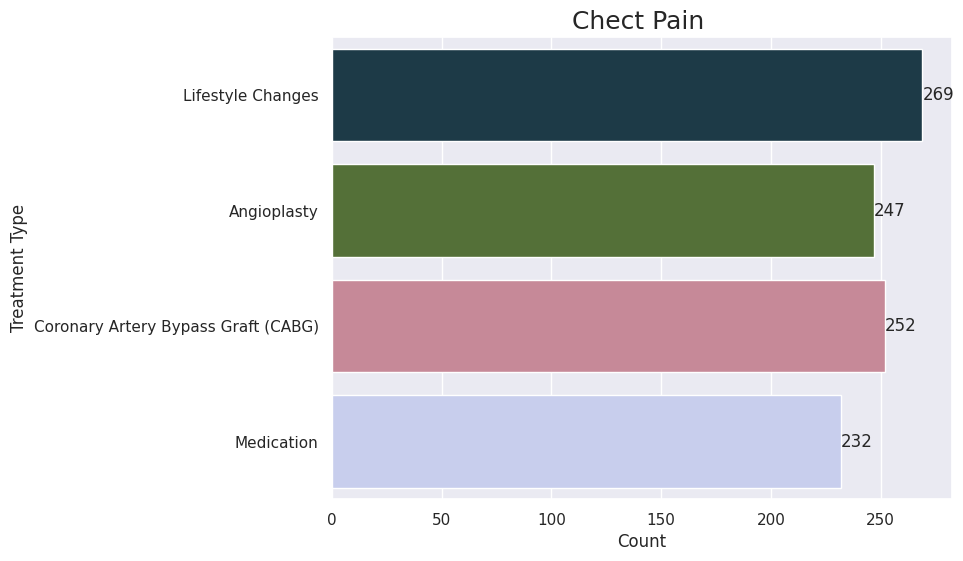

In [30]:
sns.set(rc = {'figure.figsize' : (8,6)})
ax = sns.countplot(y = "Treatment", data = data, palette = 'cubehelix')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Chect Pain ", fontsize = 18)
plt.ylabel("Treatment Type", fontsize = 12)
plt.xlabel("Count", fontsize = 12)
plt.show()